In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [26]:
df.describe().round(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000,48.000,48.000,48.000,48.000
mean,7.668,4241.833,5565.417,0.570,576.771
std,0.951,573.624,3491.507,0.055,111.886
min,5.000,3063.000,431.000,0.451,344.000
25%,7.000,3739.000,3110.250,0.530,509.500
50%,7.500,4298.000,4735.500,0.564,568.500
75%,8.125,4578.750,7156.000,0.595,632.750
max,10.000,5342.000,17782.000,0.724,968.000


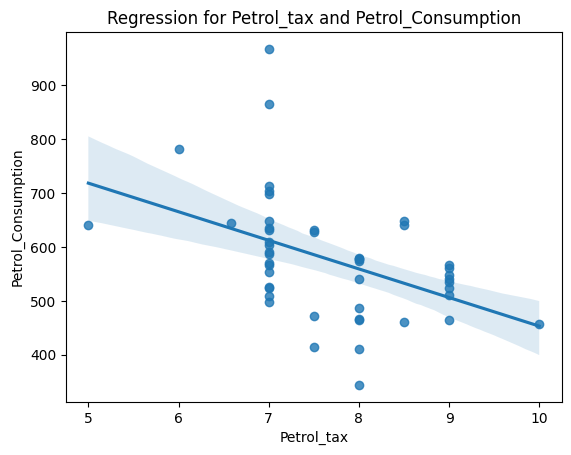

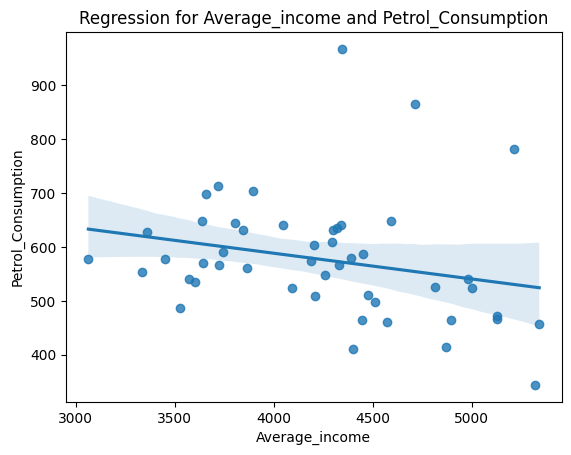

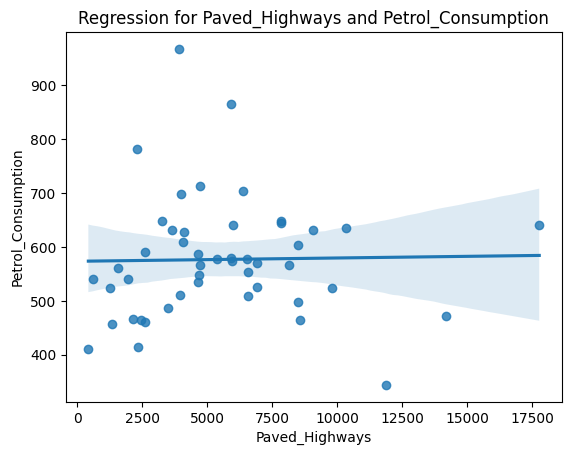

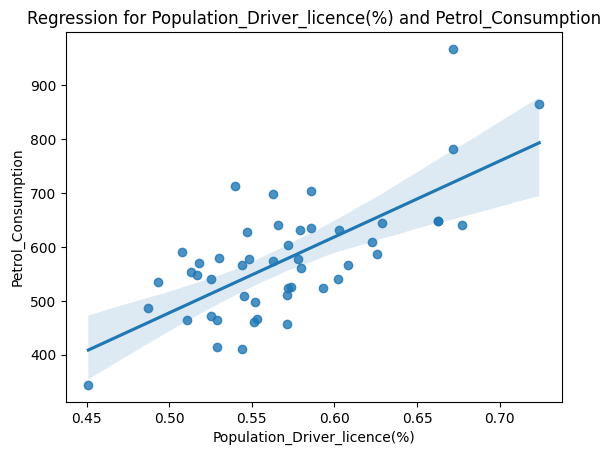

In [27]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression for {var} and Petrol_Consumption')

In [28]:
corr = df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, "Pirson's Correlation")]

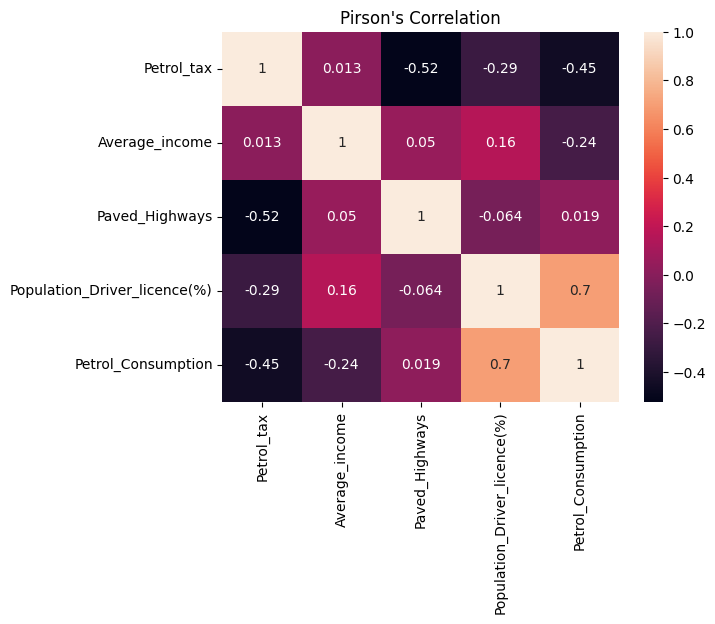

In [29]:
sns.heatmap(corr, annot=True).set(title='Pirson\'s Correlation')

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df[variables], df['Petrol_Consumption'], random_state=1)

In [31]:
lin_reg = LinearRegression().fit(x_train, y_train)

In [32]:
print('Intercept:', lin_reg.intercept_)
print('Coefficients:', lin_reg.coef_)

Intercept: 374.0014191296234
Coefficients: [-3.29250302e+01 -7.23995008e-02 -1.82584323e-03  1.35767096e+03]


In [33]:
y_pred = lin_reg.predict(x_test)

In [34]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
33,628,619.140284
23,547,462.759058
38,648,725.124513
36,640,652.494906
2,561,582.405446
3,414,488.393504
31,554,586.664264
26,577,595.113657
44,782,707.039635
27,631,618.162733


In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}', f'MSE: {mse}', f'RMSE: {rmse}', sep='\n')

MAE: 39.570304241098675
MSE: 2384.410750069735
RMSE: 48.830428526378256


In [36]:
lin_reg.score(x_train, y_train)

0.6776136672089365

In [37]:
lin_reg.score(x_test, y_test)

0.6657211902327582